## Linear Regression using Gradient Descent

In [2]:
import matplotlib.pyplot as plt
import csv
import numpy as np
import math

Importing the data csv file. This is for the case where the no of data points are more than the no of features, hence while the inverse is calculated, it is a pseudo-inverse.

In [3]:
reader = csv.reader(open("Data2.csv", "rt"), delimiter=",")
x = list(reader)
result = np.array(x).astype("float")
np.random.shuffle(result)
t_rows,t_cols=result.shape

In [4]:
X=np.delete(result,t_cols-1,1)
y=np.delete(result, np.s_[0:t_cols-1], axis=1)
X=np.insert(X,0,1,axis=1)

train_rows=int(0.7*t_rows)
test_rows=t_rows-train_rows

X_train=X[:train_rows]
X_test=X[train_rows:t_rows]

y_train=y[:train_rows]
y_test=y[train_rows:t_rows]
#print(X_train)
#print(y_train)

Normalization of features. Find the mean and std deviation only using the training data. Testing data should be kept as unseen and be normalized using the mean and std deviation of training data itself.

In [4]:
for i in range(1,t_cols-1):
    mean=np.mean(X_train[:,i])
    std_dev=np.std(X_train[:,i])
    for j in range(0,train_rows):
        X_train[j,i]=(X_train[j,i]-mean)/std_dev
    for j in range(0,test_rows):
        X_test[j,i]=(X_test[j,i]-mean)/std_dev 

Gradient Descent with Least Square Loss function

In [5]:
w=np.zeros((t_cols,1), dtype=float)
w_new=np.zeros((t_cols,1), dtype=float)
w_difference=np.zeros((t_cols,1), dtype=float)
f_xi=np.zeros((train_rows,1),dtype=float)
difference_vector=np.zeros((train_rows,1),dtype=float)
alpha=0.000001
epsilon=0.0001
w_norm=1
sum1=0
j_w=[]
iterations=0

In [6]:
while w_norm>epsilon:      
    f_xi=np.dot(w.T,X_train.T)
    f_xi=f_xi.reshape((140,1))
    y_train=y_train.reshape((140,1))
    difference_vector=np.subtract(y_train.T,f_xi.T)

    for j in range(0,t_cols):
        k=np.dot(difference_vector,X_train[:,j].reshape((140,1)))
        w_new[j]=w[j] + alpha*k

    w_norm=np.linalg.norm(np.subtract(w_new,w))
    #print(iterations,w_norm)  
    w=np.copy(w_new)
    
    Xw=np.dot(X_train,w_new)
    value_difference=np.subtract(Xw,y_train)
    jw_norm=np.linalg.norm(value_difference)
    j_w.append(0.5*(pow(jw_norm,2)))
    iterations=iterations+1

RMSE for the operation is: 2.048545481504731


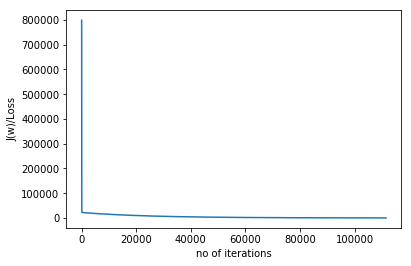

In [7]:
%matplotlib inline
plt.xlabel('no of iterations')
plt.ylabel('J(w)/Loss')
plt.plot(j_w)
#print(j_w)

f_x=np.dot(X_test,w)
for i in range(0,test_rows):
    sum1=sum1+((f_x[i]-y_test[i])**2)
#np.savetxt("w_for_data1.csv", w, delimiter=",")   
rmse=math.sqrt(sum1/test_rows)
print("RMSE for the operation is: {}".format(rmse))